In [102]:
import numpy as np
import os
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import image_utils as iu
import cv2

In [103]:
path = './nordata/'

In [104]:
fnoisy = 'gn_test/'

In [105]:
test_images = os.listdir(path + 'or_test')
test_n_images = os.listdir(path + fnoisy)

In [106]:
test_img = []
test_n_img = []
for k in range(len(test_images)):
    test_img.append(iu.load_img(path + 'or_test/' + test_images[k]))
    test_n_img.append(iu.load_img(path + fnoisy + test_n_images[k]))
    

In [107]:
test_arr = []
test_n_arr = []
for k in range(len(test_img)):
    test_arr.append(np.array(iu.img_to_array(test_img[k]))/255)
    test_n_arr.append(np.array(iu.img_to_array(test_n_img[k]))/255)

In [108]:
input_shape = (412,412)

In [109]:
model = keras.models.load_model('./model_final.h5')

In [110]:
test_n_sc = []
test_sc = []
for item in range(len(test_n_arr)):
    test_sc.append(cv2.resize(test_arr[item],input_shape,interpolation=cv2.INTER_AREA))
    test_n_sc.append(cv2.resize(test_n_arr[item],input_shape,interpolation=cv2.INTER_AREA))

In [111]:
output = model.predict(np.array(test_n_sc).reshape(-1,412,412,3))

4/4 [==============================] - 6s 1s/step


In [112]:
imid = 44

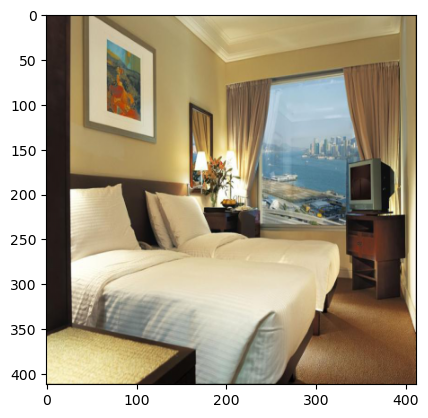

In [113]:
plt.imshow(test_sc[imid])

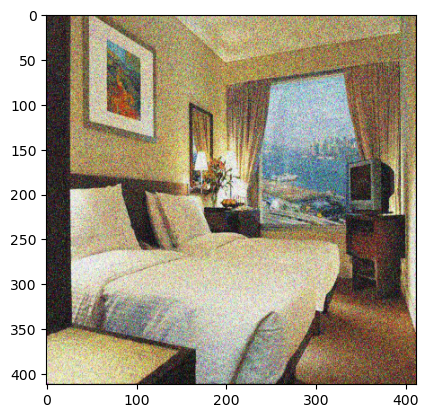

In [114]:
plt.imshow(test_n_sc[imid])

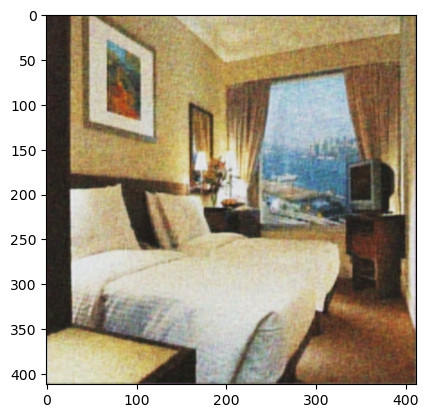

In [115]:
plt.imshow(output[imid])

In [116]:
output2 = model.predict(np.array(output[imid]).reshape(-1,412,412,3))

1/1 [==============================] - 0s 98ms/step


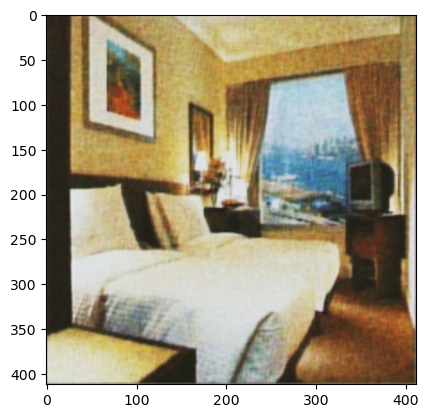

In [117]:
plt.imshow(output2[0])